# https://www.kaggle.com/c/digit-recognizer/
# with keras + CNN, scored 0.9785714285714285

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [66]:
# load csv files to numpy arrays

def load_data():
    train = pd.read_csv("train.csv")
    X_train = train.values[:,1:] 
    y_train = train.values[:,0]
    
    Pred_test = pd.read_csv("test.csv").values
    return X_train, y_train, Pred_test

def flush_predictons(predictions, output_name='out.csv'):
    '''
    predictions is a np.array of int 
    '''
    imgs = pd.Series(range(1,pred_test.shape[0]+1))
    imgd = pd.DataFrame(imgs)
    
    labeld = pd.DataFrame(predictions)
    out = pd.concat([imgd, labeld],axis=1)
    out.columns = ["ImageId", "Label"]
    out.to_csv(output_name, index = False)
    
x_train, y_train, pred_test = load_data()

In [67]:
print(x_train.shape, y_train.shape, pred_test.shape)

(42000, 784) (42000,) (28000, 784)


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(33600, 784) (33600,) (8400, 784) (8400,)


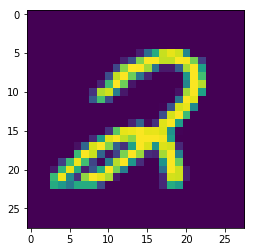

In [69]:
plt.imshow(x_train[4].reshape(28, 28))

In [70]:
from keras import models, layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten, ZeroPadding2D, BatchNormalization
from keras.optimizers import RMSprop

In [71]:
# data preprocessing for keras CNN
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')/255
x_test  = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')/255

In [72]:
batch_size = 8192
num_classes = 10
epochs = 70
pool_size=(2,2)

In [73]:
# one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [74]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(33600, 28, 28, 1) (33600, 10) (8400, 28, 28, 1) (8400, 10)


In [75]:
nets = 10
models = [0] *nets
for j in range(nets):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1,)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(epsilon=1e-6))
    model.add(MaxPool2D(pool_size=pool_size))

    model.add(ZeroPadding2D(padding=(1,1)))
    model.add(Conv2D(48, kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(epsilon=1e-6))
    model.add(MaxPool2D(pool_size=pool_size))

    model.add(ZeroPadding2D(padding=(1,1)))
    model.add(Conv2D(64, kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(epsilon=1e-6))
    model.add(MaxPool2D(pool_size=pool_size))

    model.add(ZeroPadding2D(padding=(1,1)))
    model.add(Conv2D(96, kernel_size=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(epsilon=1e-6))
    model.add(MaxPool2D(pool_size=pool_size))


    model.add(Dropout(0.4))
    model.add(Flatten())

    model.add(Dense(1280))
    model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    #model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    models[j] = model

In [76]:
history = [0] *nets
for j in range(nets):
 
    history[j] = models[j].fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = models[j].evaluate(x_test, y_test, verbose=0)
    print(j, 'Test loss:', score[0])
    print(j, 'Test accuracy:', score[1])

Train on 33600 samples, validate on 8400 samples
Epoch 1/70
33600/33600 [==============================] - 8s 224us/step - loss: 5.1857 - acc: 0.2420 - val_loss: 6.0248 - val_acc: 0.3415
Epoch 2/70
33600/33600 [==============================] - 1s 40us/step - loss: 4.6298 - acc: 0.5329 - val_loss: 2.8638 - val_acc: 0.6796
Epoch 3/70
33600/33600 [==============================] - 1s 40us/step - loss: 2.4605 - acc: 0.7156 - val_loss: 1.9218 - val_acc: 0.8226
Epoch 4/70
33600/33600 [==============================] - 1s 40us/step - loss: 1.0887 - acc: 0.8501 - val_loss: 0.2346 - val_acc: 0.9302
Epoch 5/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.2502 - acc: 0.9242 - val_loss: 0.1805 - val_acc: 0.9451
Epoch 6/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.1970 - acc: 0.9394 - val_loss: 0.2633 - val_acc: 0.9221
Epoch 7/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.2108 - acc: 0.9322 - val_loss: 0.1556 - val_acc

33600/33600 [==============================] - 1s 40us/step - loss: 0.0051 - acc: 0.9984 - val_loss: 0.0562 - val_acc: 0.9886
Epoch 61/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0722 - val_acc: 0.9823
Epoch 62/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0632 - val_acc: 0.9846
Epoch 63/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0458 - acc: 0.9882 - val_loss: 0.0770 - val_acc: 0.9832
Epoch 64/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.0075 - acc: 0.9976 - val_loss: 0.0479 - val_acc: 0.9881
Epoch 65/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.0036 - acc: 0.9988 - val_loss: 0.0511 - val_acc: 0.9876
Epoch 66/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0504 - val_acc: 0.9887
Epoch 67/70
33600/33600 [=====================

33600/33600 [==============================] - 1s 40us/step - loss: 0.0150 - acc: 0.9953 - val_loss: 0.0633 - val_acc: 0.9800
Epoch 37/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.0175 - acc: 0.9945 - val_loss: 0.0531 - val_acc: 0.9852
Epoch 38/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0252 - acc: 0.9915 - val_loss: 0.5787 - val_acc: 0.8830
Epoch 39/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.1390 - acc: 0.9681 - val_loss: 0.0535 - val_acc: 0.9851
Epoch 40/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0163 - acc: 0.9941 - val_loss: 0.0529 - val_acc: 0.9850
Epoch 41/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.0123 - acc: 0.9959 - val_loss: 0.0469 - val_acc: 0.9860
Epoch 42/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0145 - acc: 0.9952 - val_loss: 0.0624 - val_acc: 0.9839
Epoch 43/70
33600/33600 [=====================

33600/33600 [==============================] - 1s 40us/step - loss: 0.0763 - acc: 0.9757 - val_loss: 0.1284 - val_acc: 0.9614
Epoch 13/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0759 - acc: 0.9764 - val_loss: 0.0941 - val_acc: 0.9717
Epoch 14/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.1073 - acc: 0.9665 - val_loss: 0.5408 - val_acc: 0.8449
Epoch 15/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.1458 - acc: 0.9563 - val_loss: 0.1071 - val_acc: 0.9685
Epoch 16/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0513 - acc: 0.9839 - val_loss: 0.0683 - val_acc: 0.9779
Epoch 17/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0462 - acc: 0.9849 - val_loss: 0.0719 - val_acc: 0.9775
Epoch 18/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0464 - acc: 0.9855 - val_loss: 0.1647 - val_acc: 0.9511
Epoch 19/70
33600/33600 [=====================

Train on 33600 samples, validate on 8400 samples
Epoch 1/70
33600/33600 [==============================] - 7s 198us/step - loss: 5.9051 - acc: 0.2270 - val_loss: 4.3727 - val_acc: 0.4007
Epoch 2/70
33600/33600 [==============================] - 1s 40us/step - loss: 2.7443 - acc: 0.6131 - val_loss: 1.6101 - val_acc: 0.8130
Epoch 3/70
33600/33600 [==============================] - 1s 40us/step - loss: 1.2239 - acc: 0.7960 - val_loss: 0.4588 - val_acc: 0.8492
Epoch 4/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.3733 - acc: 0.8807 - val_loss: 0.3039 - val_acc: 0.8967
Epoch 5/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.2667 - acc: 0.9156 - val_loss: 0.1383 - val_acc: 0.9604
Epoch 6/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.1710 - acc: 0.9488 - val_loss: 0.1911 - val_acc: 0.9389
Epoch 7/70
33600/33600 [==============================] - 1s 39us/step - loss: 0.3071 - acc: 0.9000 - val_loss: 0.1266 - val_acc

33600/33600 [==============================] - 1s 40us/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0517 - val_acc: 0.9881
Epoch 61/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0500 - val_acc: 0.9877
Epoch 62/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0231 - acc: 0.9943 - val_loss: 0.1408 - val_acc: 0.9731
Epoch 63/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0272 - acc: 0.9922 - val_loss: 0.0590 - val_acc: 0.9863
Epoch 64/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0054 - acc: 0.9983 - val_loss: 0.0455 - val_acc: 0.9888
Epoch 65/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0456 - val_acc: 0.9896
Epoch 66/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0499 - val_acc: 0.9893
Epoch 67/70
33600/33600 [=====================

33600/33600 [==============================] - 1s 42us/step - loss: 0.0146 - acc: 0.9950 - val_loss: 0.0489 - val_acc: 0.9856
Epoch 37/70
33600/33600 [==============================] - 1s 41us/step - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0466 - val_acc: 0.9874
Epoch 38/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0140 - acc: 0.9951 - val_loss: 0.0481 - val_acc: 0.9879
Epoch 39/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0629 - val_acc: 0.9833
Epoch 40/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.1100 - acc: 0.9749 - val_loss: 0.0723 - val_acc: 0.9805
Epoch 41/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0256 - acc: 0.9916 - val_loss: 0.0469 - val_acc: 0.9875
Epoch 42/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0445 - val_acc: 0.9881
Epoch 43/70
33600/33600 [=====================

33600/33600 [==============================] - 1s 40us/step - loss: 1.5214 - acc: 0.8901 - val_loss: 1.5339 - val_acc: 0.8840
Epoch 13/70
33600/33600 [==============================] - 1s 40us/step - loss: 1.5125 - acc: 0.8921 - val_loss: 1.5211 - val_acc: 0.8901
Epoch 14/70
33600/33600 [==============================] - 1s 39us/step - loss: 1.5180 - acc: 0.8910 - val_loss: 1.8317 - val_acc: 0.8164
Epoch 15/70
33600/33600 [==============================] - 1s 40us/step - loss: 1.8088 - acc: 0.8125 - val_loss: 0.4902 - val_acc: 0.8660
Epoch 16/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.1572 - acc: 0.9508 - val_loss: 0.1313 - val_acc: 0.9583
Epoch 17/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0702 - acc: 0.9774 - val_loss: 0.0946 - val_acc: 0.9712
Epoch 18/70
33600/33600 [==============================] - 1s 40us/step - loss: 0.0583 - acc: 0.9816 - val_loss: 0.0969 - val_acc: 0.9707
Epoch 19/70
33600/33600 [=====================

In [77]:
pred_test = pred_test.reshape(pred_test.shape[0], 28,28,1).astype('float32')/255
#pred = model.predict_classes(pred_test)

In [78]:
results = np.zeros( (pred_test.shape[0],10) ) 
for j in range(nets):
    results = results + models[j].predict(pred_test)
results = np.argmax(results,axis = 1)

In [79]:
flush_predictons(results, output_name='keras_cnn2_15.csv')

In [80]:
#model.save("keras_cnn2.h5")

In [81]:
#from keras.models import load_model

#model = load_model("keras_cnn.h5")